In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('snsdata.csv')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Задание 4.1

Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [56]:
df = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
df.shape

(30000, 36)

In [57]:
df_copy = df.copy()

Задание 4.2

Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Ответ округлите до двух знаков после точки-разделителя.

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df[0][0]

-0.3322172643985876

Задание 4.3

Реализуйте алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмите число 42. Выведите получившееся значение инерции (model.inertia_). Ответ округлите до двух знаков после точки-разделителя.

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(df)
kmeans.inertia_

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


857169.1033997746

Задание 4.4

Сколько подростков относится к наиболее многочисленному кластеру? А сколько — к самому малочисленному?

In [60]:
clusters = pd.Series(kmeans.labels_)
clusters.value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
dtype: int64

Задание 4.5

1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9. Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается наименьшая инерция.

2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

In [61]:
inertia = list()
for i in range(3,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    inertia.append([i,kmeans.inertia_])
    
inertia = pd.DataFrame(inertia, columns=['K','inertia'])

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

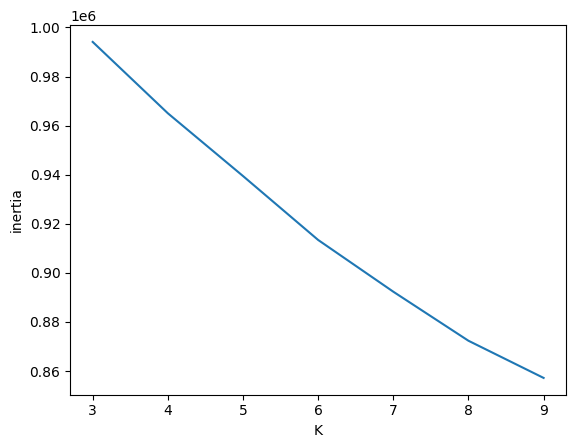

In [62]:
fig = sns.lineplot(inertia, x='K', y='inertia')

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

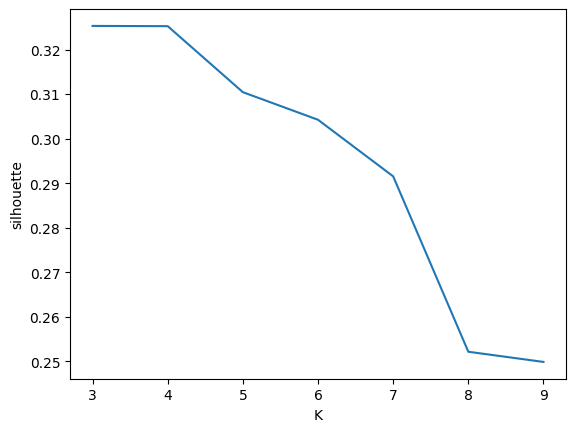

In [63]:
from sklearn.metrics import silhouette_score

silhouette = []

for i in range(3,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    silhouette.append([i,silhouette_score(df, kmeans.labels_)])


silhouette = pd.DataFrame(silhouette, columns=['K','silhouette'])    
fig = sns.lineplot(silhouette, x='K', y='silhouette')

Задание 4.6

Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта.

Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

In [96]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

data = pd.concat([df_copy, pd.Series(kmeans.labels_, name='cluster')], axis=1 )

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [97]:
data = data.groupby('cluster').sum().T.reset_index()

In [119]:
cluster_keys = []
for i in range(3):
    keys = list(data.sort_values(i, ascending=False).iloc[:10]['index'].values)
    cluster_keys.append(keys)


A = set(cluster_keys[0]).intersection(set(cluster_keys[1]))
A = A.intersection(set(cluster_keys[2]))
A

{'dance', 'god', 'hair', 'music'}

Задание 4.7

Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [122]:
from sklearn.mixture import GaussianMixture
GM = GaussianMixture(n_components=3, random_state=42) 
GM.fit(df)

GaussianMixture(n_components=3, random_state=42)

In [123]:
pd.Series(GM.predict(df)).value_counts()

0    23426
1     6573
2        1
dtype: int64

Задание 4.8

В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:

In [141]:
clusters = pd.Series(GM.predict(df), name='cluster')
data = pd.concat([df_copy, clusters], axis=1 )
data = data.groupby('cluster').sum().reset_index().T
set(data.sort_values(2, ascending=False).iloc[:3].index)

{'blonde', 'hair', 'sex'}